<h1><center>Pytorch Tutorial !</center></h1>   
-----------------------------------------------------------------------------***
Author: Biswash Bhusal
***--------------------------------------------------------------------------------------------

### What will be in this notebook ? 
        1. Definations
        2. Understanding Pytorch 
        3.Advantage of this framework
        4. Understanding and implementating pytorch for mnist classification
    

There are four major more deep learing libraries in Python. Google use Tensorflow while Pytorch is main framework for facebook.
    1. Tensorflow
    2. Theano
    3. PyTorch
    4. Keras

## PyTorch: 
    1. Pytorch is python based scientific computing package.The Greatest advantage for researcher is its dynamic graph (Fix the code as you write single line, compare to static graph where you will write the code first and run after that)
    2. Pytorch is really fast and has great python support.
    3. Dynamic Computation Graphs: Build the graph as you go. 
    4. CUDA: Compute Unified Devise Architect
    5. Torch has autograde module: meaning compute differentiation by itself
        In Pytorch, Dynamic computation graphing: Meaning, Pytoch is Define at runtime while tensorflow is Define and run where we define conditions and iterations in the graph structure ( degree of freedom is limited in tensorflow)
    
    

### Terminologies: 
        Tensor: Imperative N-dimensional Array Running on GPU
        Variable: Node in Computational Graph - To store Data and Gradient 
        Module: Neural Network Layer -Stores State or Learnable Weights
        

### Tensor and Array :
---------------------------------------
Tensor is more mathematical way of representing matrix .For example, tensor with 1 is scalar. Genarally, Mathematical term for multidimensional array

##### Code Implementation:

In [1]:
## Version Check 
import torch
torch.__version__

'1.0.1'

In [2]:
import torchvision
torchvision.__version__

'0.2.1'

In [3]:
import numpy as np
np.__version__

'1.15.4'

In [ ]:
### What is cool about Pytorch :
# Dynamic graph 

### Easy to Debug 
import torch 
from IPython.core.debugger import set_trace

def f(x):
    response = x + x
    set_trace()
    return response
x= torch.randn(1, requires_grad=True)
y=f(x)

> <ipython-input-4-d4b6f89cad7b>(11)f()
      9     response = x + x
     10     set_trace()
---> 11     return response
     12 x= torch.randn(1, requires_grad=True)
     13 y=f(x)

ipdb> response
tensor([-1.8701], grad_fn=<AddBackward0>)
ipdb> x
tensor([-0.9351], requires_grad=True)


In [1]:
# Import package 
import torch 
x= torch.rand(5,3)
print(x)

tensor([[0.8783, 0.1902, 0.2864],
        [0.1926, 0.4632, 0.1901],
        [0.1218, 0.3494, 0.2309],
        [0.9304, 0.8505, 0.9069],
        [0.2176, 0.6490, 0.0636]])


In [2]:
y= torch.tensor([5.3,3])   ## This are tensor data not a dimension 
print(y)

tensor([5.3000, 3.0000])


In [3]:
### Create a tensor based on existing tensor. These methods will reuse properties of input tensor. 
        # e.g. dtype, unless new values are provided by user. 
x= x.new_ones(5,3, dtype=torch.double)
print (x)

x= torch.randn_like(x, dtype= torch.float)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.7490, -1.5189,  0.1248],
        [-0.7421,  1.0636, -1.5552],
        [-0.1873,  1.8014,  1.8409],
        [ 0.1706,  0.1193,  0.1973],
        [-1.4960, -0.5381, -1.9632]])


In [4]:
## Print the size for torch variable
print(x.size()) # Get the size

torch.Size([5, 3])


In [26]:
### Addition in torch 
print (torch.add(x,x)) 

tensor([[-1.4980, -3.0378,  0.2497],
        [-1.4841,  2.1272, -3.1104],
        [-0.3746,  3.6028,  3.6818],
        [ 0.3412,  0.2386,  0.3947],
        [-2.9919, -1.0762, -3.9264]])


In [22]:
### Multiplication in torch 
d= 3
a= torch.rand(d,d)
b=torch.rand(d,d)
c= torch.mm(a,b)   ## MM is matrix mutiplication 
print (c)

tensor([[1.5709, 1.4761, 0.4647],
        [1.3920, 1.3419, 0.3893],
        [1.2084, 1.2199, 0.3787]])


In [22]:
### Create Identity Matrix 
print (torch.eye(3))
print (torch.eye(3).size())
## We can do same in numpy as
import numpy as np
print (np.eye(3))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
torch.Size([3, 3])
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Slicing Tensor:

In [41]:
## we can use almost all of the operators used in numpy in tensor
A= torch.eye(4)
print (A[0:2])
print (A[:,0:2])

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.]])
tensor([[1., 0.],
        [0., 1.],
        [0., 0.],
        [0., 0.]])


### Converting Tensor to Numpy and Vice Versa:

In [40]:
A= torch.randn(4,4)
print(A)

### Torch to Numpy: 
print(A.numpy())

### Numpy to Torch:
B=torch.from_numpy(np.eye(3))
print(B)

tensor([[-0.4141,  1.2926,  0.9139,  1.1765],
        [-1.2926, -0.5543,  1.8079,  0.9514],
        [-1.7203, -0.1145,  0.0322,  1.0365],
        [-0.7149,  2.9967,  0.1064, -0.9617]])
[[-0.41412702  1.2926228   0.9138765   1.1764615 ]
 [-1.2925781  -0.55432403  1.8079388   0.9514374 ]
 [-1.720293   -0.11450333  0.03217447  1.0364578 ]
 [-0.71490216  2.9967227   0.10644145 -0.9617438 ]]
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], dtype=torch.float64)


In [45]:
### If you have a one element tensor.  
x= torch.randn(1)
print(x)

#use 'item' to get the values as a pytorch number
print(x.item())

tensor([-0.4787])
-0.47873610258102417


### Use of CUDA Tensors
##### All the Tensors on the CPU except a CharTensor support converting to Numpy and back. Tensors can be moved onto any device using the "to" method. We will use 'torch.device' to move tensors in and out of GPU. Lets check if CUDA is available in this machine;


In [33]:
if torch.cuda.is_available():
    print ("Yes")
else:
    print("Not Available")

Not Available


In [24]:
if torch.cuda.is_available():
    device = torch.device("cuda")   # CUDA Device object
    y= torch.ones_like(x, device=device) # Directly create a tensor on GPU 
    x=x.to(device)  #'to' cuda 
    z=x+y
    print(z)  

### Create a Neural Network Using Pytorch: 

        Start -----------Neural Network----------using -------torch.nn.package ------------autograd
        |
        |              --------Methods--------forward(input)------------returns output
        |             |
        nn.module ----
                      |
                      ---------layers
        

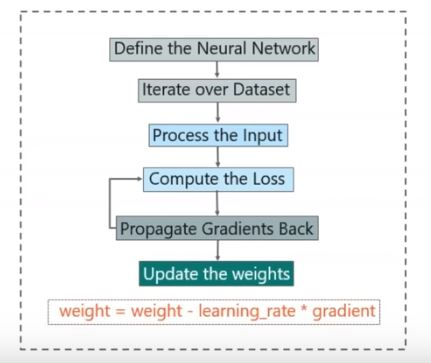

In [39]:
### Training Procedure for a neural network is as follows:
from IPython.display import Image
Image("neural_training.jpg")

#### Quick Recap: 
        Torch.Tensor---------Multi-Dimensional array with support for autograd operations like backward()
        nn.Module------------Neural Network module for encapsulating parameters to mve them to GPU 
        nn.Parameter---------Tensor which is registered as parameter when assigned as attribute to module
        Autograd.Function----Implements forward and backward definations of an autograd operations

### Autograd:

In [51]:
from torch import autograd
w= torch.ones(1)
print(w)
w.requires_grad

tensor([1.])


False

In [47]:
z= torch.ones(1)*2
print(z.requires_grad)

total= w+z
total

False


tensor([3.])

In [50]:
total.backward()

In [52]:
w= torch.ones(1, requires_grad=True)  # True will allow to use backward to get gradient
print(w)
w.requires_grad

tensor([1.], requires_grad=True)


True

In [53]:
z= torch.ones(1)*2
print(z.requires_grad)

total= w+z
total

False


tensor([3.], grad_fn=<AddBackward0>)

In [54]:
total.backward()

In [55]:
w.grad

tensor([1.])

In [58]:
with torch.no_grad():  ## This will help you not to track gradient if you know you are not going to use it later
    total =w+z 
total.requires_grad

False

..............
The Biggest advantage of using tensor is it will auto calculate gradient. Also, Tensor can be easily move to GPU. Therefore there is the need to define tensor over numpy array.
...........

#### Step by Step for Neural Network:

In [11]:
### Some Examples: 
import torch 
import torch.nn as nn #neural nework
import torch.nn.functional as F # functional interface very similar to nn
from collections import OrderedDict
import torchvision

## Simple Sequential model
## 
layers = OrderedDict([
    ('conv2_layer_1' , nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5)),
    ('relu_layer_1', nn.ReLU()),
    ('conv2_layer_2', nn.Conv2d(26,64,5)),
    ('relu_layer_2', nn.ReLU())
])

model =nn.Sequential(layers)

In [10]:
class Net(nn.Module):  # create the class , inherate from nn
    def __init__(self):  #
        super(Net, self).__init__()  # parent function
        self.conv1= nn.Conv2d(in_channels=2, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
        self.fc2= nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        x= self.pool(F.relu(self.conv1(x)))
        x= self.pool(F.relu(self.conv2(x)))
        x=x.view(-1, 16*5*5)
        x= F.relu(self.fc1(x))
        x= F.relu(self.fc2(x))
        x= self.fc3(x)
        return x
    
net = Net()